In [1]:
#import stuff

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#must need for preprocessing and evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot

#libraries for the ML model
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

#libraries for exporting
from joblib import dump, load


stdScaler = StandardScaler()

water_data = pd.read_csv("water_dataX_wqi_cleaned.csv")

In [2]:
#preprocessing

X = water_data.drop(columns = ['STATION CODE','LOCATIONS','STATE','Temp','Potability','WQI','year'])
X = pd.DataFrame(stdScaler.fit_transform(X), columns = X.columns)

yWQI = water_data['WQI']
yPot = water_data['Potability']

X

,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATE N+ NITRITEN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean
0,-0.496288,-0.055456,-0.305157,-0.156496,-0.427924,-0.041998,-0.039903
1,-0.029932,-0.055726,-0.307036,-0.171145,-0.463649,-0.042187,-0.040101
2,-0.418562,-0.055726,-0.328652,-0.068603,-0.320749,-0.041950,-0.039900
3,-0.418562,-0.055366,-0.325081,-0.161379,-0.356474,-0.042167,-0.040090
4,-0.651741,-0.055276,-0.325457,-0.180910,-0.463649,-0.042230,-0.040184
...,...,...,...,...,...,...,...
1572,0.747330,0.098284,-0.339423,-0.180910,-0.450074,-0.042546,-0.040434
1573,0.591877,0.130688,-0.339404,-0.141847,-0.290383,-0.042546,-0.040424
1574,0.436425,0.069480,-0.339347,-0.156496,-0.318606,-0.042546,-0.040444
1575,0.514151,0.060479,-0.339272,-0.185793,-0.281809,-0.042546,-0.040433


In [8]:
#export scaler
dump(stdScaler,'StdScaler.pkl')


['StdScaler.pkl']

In [113]:
#support vector classification
clf = SVC(kernel="rbf", C = 1.03, gamma = 0.25)

X_train, X_test, y_train, y_test = train_test_split(X, yPot, test_size = 0.3)

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)

print("accuracy: " + str(accuracy))
print("precision: " + str(precision))


accuracy: 0.8565400843881856
precision: 0.8439024390243902


In [114]:
#multilayer perceptron classifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1,max_iter = 1000)

X_train, X_test, y_train, y_test = train_test_split(X, yPot, test_size = 0.3)

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)

print("accuracy: " + str(accuracy))
print("precision: " + str(precision))

accuracy: 0.8713080168776371
precision: 0.8623376623376623


In [3]:
#linear regression
clf = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, yWQI, test_size = 0.2)

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

print("mean squared error: " + str(MSE))
print("mean average error: " + str(MAE))
print("R squared: " + str(r_squared))     
clf.n_features_in_


mean squared error: 9.281823574134293e-13
mean average error: 5.064492200015398e-07
R squared: 1.0


7

In [4]:
#export linear regression
dump(clf, 'WQIModelv1.pkl')


['WQIModelv1.pkl']

In [10]:
model = load('WQIModelv1.pkl')
scaler = load('StdScaler.pkl')
value = [1,2,3,4,5,6,7]
value = np.array(value).reshape(1, -1)
value = scaler.transform(value)
prediction = model.predict(value)
prediction

array([15.15462763])

mean squared error: 159864690992.5783
mean average error: 32402.114398019807
R squared: 0.05904040944833233
Loss: 4045915480.572639


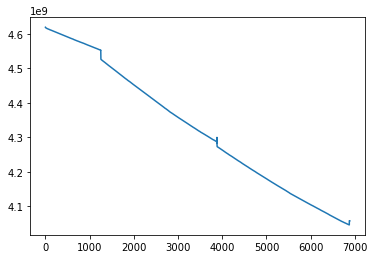

In [42]:
#Multilayer Perceptron Regression
mlprgs = MLPRegressor(activation = 'logistic', hidden_layer_sizes=(1), tol = 0.0000000001, learning_rate_init = 10, learning_rate = 'adaptive', max_iter = 100000)

X_train, X_test, y_train, y_test = train_test_split(X, yWQI, test_size = 0.2)

mlprgs.fit(X_train, y_train)

predictions = mlprgs.predict(X_test)

MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

print("mean squared error: " + str(MSE))
print("mean average error: " + str(MAE))
print("R squared: " + str(r_squared)) 

pyplot.plot(mlprgs.loss_curve_)

#[list(range(100))]


print("Loss: " + str(mlprgs.best_loss_))

In [4]:
#Decision Tree Regression
clf = DecisionTreeRegressor()

X_train, X_test, y_train, y_test = train_test_split(X, yWQI, test_size = 0.2)

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

print("mean squared error: " + str(MSE))
print("mean average error: " + str(MAE))
print("R squared: " + str(r_squared))  

mean squared error: 13840687761.250898
mean average error: 6833.485140704289
R squared: 0.7346292866263402


In [45]:
#support vector regression
clf = SVR(kernel = 'rbf', gamma = 'auto', C = 1.05, epsilon = 0.1)

X_train, X_test, y_train, y_test = train_test_split(X, yWQI, test_size = 0.2)

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

print("mean squared error: " + str(MSE))
print("mean average error: " + str(MAE))
print("R squared: " + str(r_squared))  

mean squared error: 1346832236.185008
mean average error: 3192.5793665558326
R squared: -0.007364464353389444


In [51]:
#random forest regressor
clf = RandomForestRegressor(n_estimators = 200, max_depth = 10000)

X_train, X_test, y_train, y_test = train_test_split(X, yWQI, test_size = 0.2)

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

print("mean squared error: " + str(MSE))
print("mean average error: " + str(MAE))
print("R squared: " + str(r_squared))  

mean squared error: 2336712234.169288
mean average error: 6867.912042253667
R squared: 0.9361764422012349
